In [1]:
import sys
sys.path.append("..")

In [2]:
from pathlib import Path
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy import units
import glob

In [6]:
datapath = Path("../../data/my_data/")

In [7]:
ff = datapath / "icct01i3q_flt.fits"

In [8]:
hdulist = fits.open(ff)

In [9]:
print('\n'.join([i.__repr__() for i in hdulist]))

In [10]:
hdu = hdulist[0]
hdr = hdu.header
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   13 / Number of standard extensions                  
FILENAME= 'icct01i3q_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [11]:
for hdu in hdulist[1:]:
    print(hdu.header['EXTNAME'])

SCI
ERR
DQ
SAMP
TIME
HDRLET
HDRLET
HDRLET
HDRLET
HDRLET
WCSCORR
HDRLET
HDRLET


In [12]:
hdu.data

array([83, 73, 77, ..., 32, 32, 32], dtype=uint8)

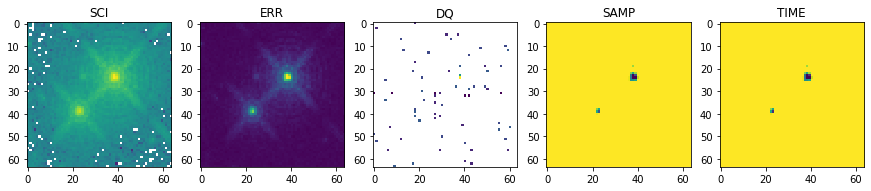

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in np.arange(0, 5):
    axes[i].imshow(hdulist[i+1].data, norm=mpl.colors.LogNorm())
    axes[i].set_title(hdulist[i+1].header['EXTNAME'])
# plt.colorbar()
# plt.title(hdr['EXTNAME'])

In [14]:
hdulist.close()

# Check all the images

In [15]:
filenames = list(datapath.glob("i*fits"))

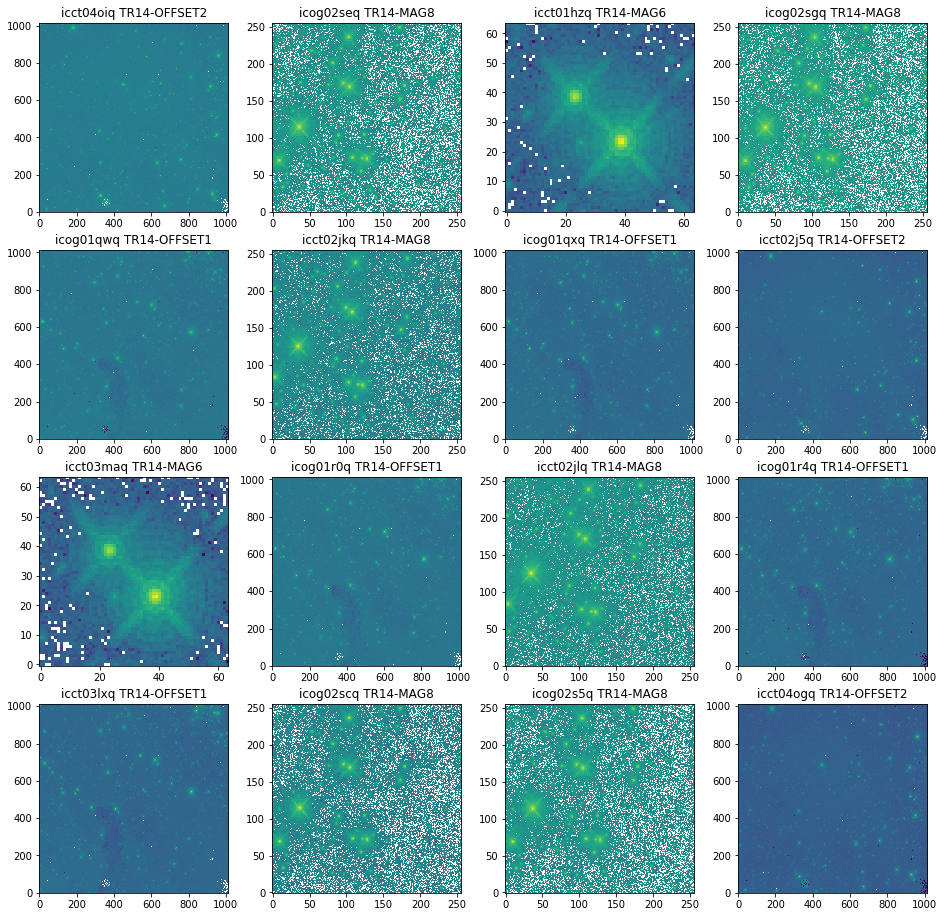

In [16]:
# pick 16 images at random
nplots = 16
nimages = len(filenames)
nimg_ind = np.arange(nimages)
if True: # toggle random order
    np.random.shuffle(nimg_ind)
img_ind = nimg_ind[:nplots]

shape = (4, 4)
fig, axes = plt.subplots(*shape, figsize=(16, 16))
for i, ax in enumerate(axes.ravel()):
    ff = filenames[img_ind[i]]
    hdulist = fits.open(ff)
    hdr = hdulist[0].header
    img = hdulist[1].data
    ax.imshow(img, norm=mpl.colors.LogNorm(), origin='lower')
    ax.set_title(hdr['ROOTNAME'] + ' ' + hdr['TARGNAME'])
    hdulist.close()

# Quick calc of the separation of a 1500 day companion to a 15 Msol star

In [17]:
from astropy import constants as const

In [18]:
G = const.G.to(units.AU**3 * units.Msun**-1 * units.year**-2)
M0 = 15 * units.Msun
T_max = 1500 * units.day.to(units.year) * units.year
def calc_sep(M0 = 15 * units.Msun, T=T_max):
    R = (T**2 * (G * M0)/(4*np.pi**2))**(1/3.)
    return R
max_sep = calc_sep()

In [20]:
tr14_dist = 2700 * units.parsec
max_sep / tr14_dist

def au2arcsec(sep, dist=tr14_dist):
    """
    Convert separation in AU to arcsec given a distance in pc
    """
    conv_units = units.AU / units.arcsec / units.pc
    arcsec = sep / dist / conv_units
    return arcsec

au2arcsec(max_sep, tr14_dist).to(units.mas)


<Quantity 2.34240441 mas>

#  Full-field image 

In [21]:
ff = filenames[7]

In [22]:
hdulist = fits.open(ff)
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x12079c1d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1207a9a90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1207abcd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1207afdd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1207b1d50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1207b4d10>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207b77d0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207b9210>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207b7850>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207b74d0>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207b4450>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1207b1990>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207af450>, <astropy.io.fits.hdu.base.NonstandardExtHDU object at 0x1207abbd0>]

In [23]:
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   13 / Number of standard extensions                  
FILENAME= 'icct02jfq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [24]:
data = hdulist[1].data#[200:400,200:400]

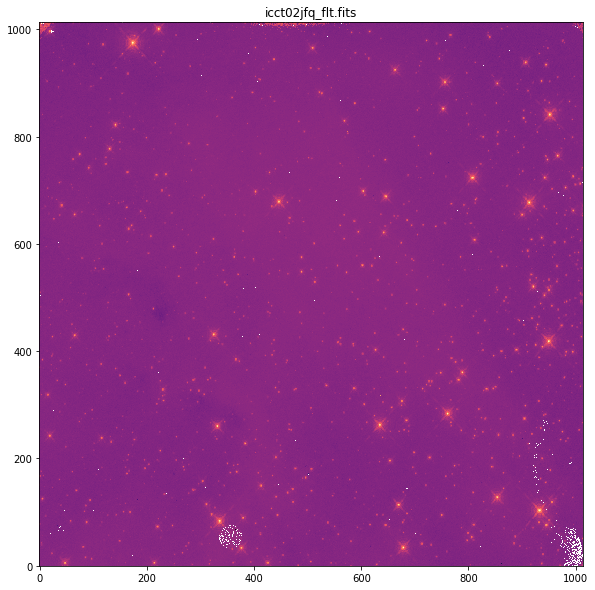

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
imax = ax.imshow(data, origin='lower', 
                 cmap=mpl.cm.magma,
                 norm=mpl.colors.LogNorm())
ax.set_title(ff.name);
if False:
    fig.savefig('../figs/' + ff.stem + '.png', bbox_inches='tight')

# Source detection

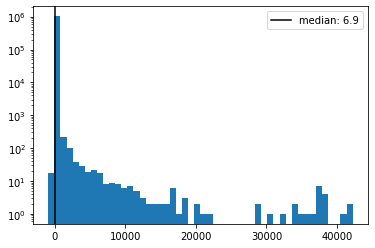

In [27]:
# First, let's look at a histogram
fig, ax = plt.subplots(1, 1)
ax.hist(data.ravel(), bins=50, log=True);
ax.axvline(np.median(data), c='k', label='median: {0:0.1f}'.format(np.median(data)))
ax.legend()

In [28]:
import photutils
from astropy.stats import sigma_clipped_stats

In [29]:
mean, median, std = sigma_clipped_stats(data, sigma=2.0)  

In [30]:
print(mean, median, std)

6.818903 6.770411 0.97243106


In [31]:
from photutils import DAOStarFinder

In [32]:
ff

PosixPath('../../data/my_data/icct02jfq_flt.fits')

In [33]:
daofind = DAOStarFinder(fwhm=1.5, threshold=5.*std, brightest=10000)
sources = daofind(data - median).to_pandas()

In [34]:
sources.shape

(2012, 11)

In [35]:
plot_sources = sources.query("flux <= flux.max()")

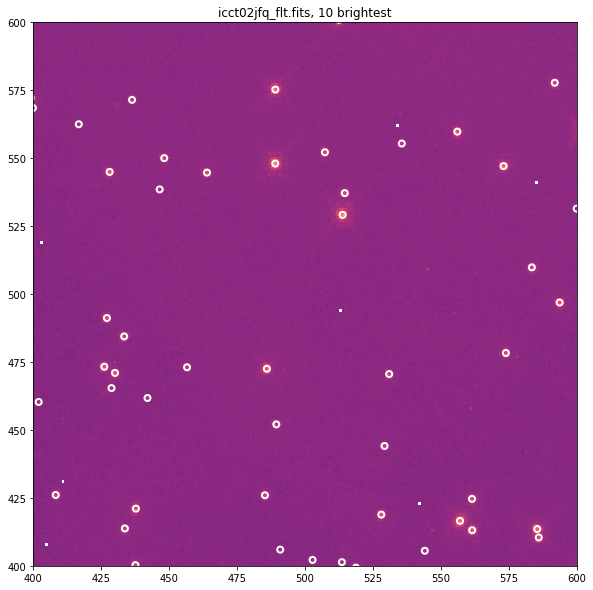

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(data, origin='lower',
          norm=mpl.colors.LogNorm(),
          cmap=mpl.cm.magma)
ax.scatter(plot_sources['xcentroid'], 
           plot_sources['ycentroid'], 
           ec='w', lw=2, fc='none')
ax.set_xlim(400, 600)#(0, data.shape[1])
ax.set_ylim(400, 600)#(0, data.shape[0])
ax.set_title(ff.name + ', 10 brightest');
ax.set_aspect('equal')
if False:
    fig.savefig('figs/' + ff.stem + '-brightest10.png', bbox_inches='tight')

In [37]:
hdulist.close()

# giovanni's database

ff = "/user/jaguilar/WFC3_NGC1976_df.hdf"

df = pd.read_hdf(ff, 'StrampelliWFC32019')

store = pd.HDFStore(ff)

keys = store.keys()
print('\n'.join([f'{str(i)} {k}' for i, k in enumerate(keys)]))

i = 6
print(keys[i])
store.get(keys[i])

# Get all the proposal ID numbers

In [38]:
from utils import table_utils as tutils
from utils import header_utils as hutils
prihdrs = hutils.load_headers('pri')

Error: /user/jaguilar/tr14/tr14/data/my_data not found.
Error: /user/jaguilar/tr14/tr14/data/tables not found.
Error: /user/jaguilar/tr14/tr14/data/tables/db.hdf5 not found.
Error: /user/jaguilar/tr14/tr14/data/align_catalog not found.
Error: /user/jaguilar/tr14/tr14/data/ks2.1 not found.


FileNotFoundError: File /user/jaguilar/tr14/tr14/data/tables/db.hdf5 does not exist

In [52]:
from importlib import reload
reload(tutils)

<module 'utils.table_utils' from '/user/jaguilar/tr14/code/utils/table_utils.py'>

In [54]:
fullframe = tutils.get_value(prihdrs, 'subarray', False)

In [139]:
ff

PosixPath('../data/my_data/icct02jfq_flt.fits')

In [56]:
fullframe.loc[7]

simple                                     True
bitpix                                       16
naxis                                         0
extend                                     True
origin                 HSTIO/CFITSIO March 2010
                           ...                 
npolfile                                    NaN
idctab                  iref$w3m18525i_idc.fits
d2imfile                                    NaN
sipname                     icct02jfq_w3m18525i
distname    icct02jfq_w3m18525i-NOMODEL-NOMODEL
Name: 7, Length: 166, dtype: object

In [140]:
ff = Path("../data/sabbi_data/") / fullframe.loc[7]['filename']
hdulist = fits.open(ff)

In [141]:
for i, hdu in enumerate(hdulist[1:]):
    print(i+1, hdu.header['EXTNAME'], hdu.header['NAXIS'], hdu.header['NAXIS1'])

1 SCI 2 1014
2 ERR 2 1014
3 DQ 2 1014
4 SAMP 2 1014
5 TIME 2 1014
6 HDRLET 1 5760
7 HDRLET 1 5760
8 HDRLET 1 8640
9 HDRLET 1 8640
10 HDRLET 1 8640
11 WCSCORR 2 455
12 HDRLET 1 8640
13 HDRLET 1 8640


In [204]:
hdu = hdulist[0]
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-12-30' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   13 / Number of standard extensions                  
FILENAME= 'icct02jfq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

Text(0.5, 1.0, 'OPUS-HSC30, 8640')

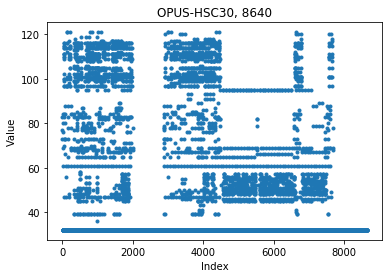

In [166]:
hdu = hdulist[10]
fig, ax = plt.subplots(1, 1)
ax.scatter(np.arange(hdu.data.size), hdu.data, marker='.')
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.set_title(hdu.header['WCSNAME'] + ', '+ str(hdu.data.size))

In [186]:
hdus = [np.array(hdulist[i].data, dtype=np.float) for i in [6, 7, 8, 9, 10, 12, 13]]

In [187]:
hdus[0]/hdus[1]

array([1., 1., 1., ..., 1., 1., 1.])

Text(0, 0.5, 'Value')

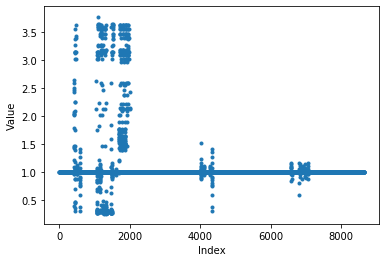

In [200]:
fig, ax = plt.subplots(1, 1)
i, j = 4, 5
ax.scatter(np.arange(hdus[i].size), hdus[i]/hdus[j][:hdus[i].size], marker='.')
ax.set_xlabel("Index")
ax.set_ylabel("Value")
# ax.set_title(hdus[0].header['WCSNAME'] + ', '+ str(hdu.data.size))

In [95]:
wcs = hdu.data

In [144]:
wcs.columns

ColDefs(
    name = 'WCS_ID'; format = '40A'
    name = 'EXTVER'; format = 'I'
    name = 'WCS_key'; format = 'A'
    name = 'HDRNAME'; format = '24A'
    name = 'SIPNAME'; format = '24A'
    name = 'NPOLNAME'; format = '24A'
    name = 'D2IMNAME'; format = '24A'
    name = 'CRVAL1'; format = 'D'
    name = 'CRVAL2'; format = 'D'
    name = 'CRPIX1'; format = 'D'
    name = 'CRPIX2'; format = 'D'
    name = 'CD1_1'; format = 'D'
    name = 'CD1_2'; format = 'D'
    name = 'CD2_1'; format = 'D'
    name = 'CD2_2'; format = 'D'
    name = 'CTYPE1'; format = '24A'
    name = 'CTYPE2'; format = '24A'
    name = 'ORIENTAT'; format = 'D'
    name = 'PA_V3'; format = 'D'
    name = 'RMS_RA'; format = 'D'
    name = 'RMS_Dec'; format = 'D'
    name = 'NMatch'; format = 'J'
    name = 'Catalog'; format = '40A'
    name = 'DESCRIP'; format = '128A'
)

In [205]:
hdulist.close()